# Gaussian Distribution

Gaussian distribusion is one of the most simplest distribusions but powerful and useful one. 


$$f(x | \mu, \sigma^2) = 
\frac{1}{ \sqrt{2 \pi \sigma^2}} e ^ {- \frac{(x - \mu)^2}{2\sigma^2}}$$

where 
* $\mu$:= the mean 
* $\sigma$:= the standard deviation
* $\sigma^2$:= variance


$$
       f(x \mid \mu, \tau) =
           \sqrt{\frac{\tau}{2\pi}}
           \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}$$


# How to generate samples using numpy

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Parameters
n_sample = 100
n_bins = 100
mu, sigma = 0, 0.1 # mean and standard deviation
bins = np.linspace(-1, 1, 100)
# Generate samples 
df_samples = pd.DataFrame(data=[np.random.normal(mu, sigma, n_sample)], index=['samples']).T
df_samples.head()

,samples
0,-0.116945
1,-0.087425
2,0.013652
3,0.032919
4,0.044818


# Visualization

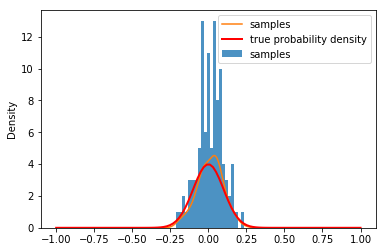

In [3]:
# Plot samples as histogram
ax = df_samples.plot(kind='hist', bins=bins, alpha = 0.8, density = False);

# plot estimated probability distribution by kernel density estimation
df_samples.plot.kde(ax=ax, label='estimated probability density');

# plot the true probability distribution
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2)), 
        linewidth=2, color='r', label='true probability density');
ax.legend(loc='upper right');

# Estimate Parameter

## Frequentist

Now we can estimate the mean and standard deviation based on the samples as a frequentist

In [4]:
df_samples.describe()

,samples
count,100.000000
mean,0.012617
std,0.083563
min,-0.193993
25%,-0.041505
50%,0.020146
75%,0.070952
max,0.221999


Therefore, the mean of the samples is 0.02 and the std of the samples is 0.1009

## Bayesian

Now let's take Bayesian approach to see the difference between Frequentist and Baysian approaches to estimate the parameters. 

In [6]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


In [30]:
# Define x as random variable following Normal Distribusion

basic_model = pm.Model()
with basic_model:
    x = pm.Normal(name='x', mu=mu, sd=sigma)

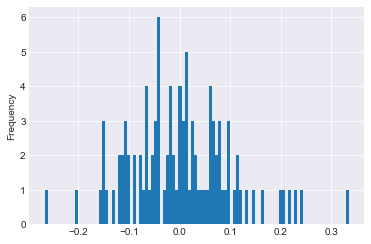

In [33]:

pd.Series(x.random(size=n_sample)).plot.hist(bins=n_bins);

In [36]:
x.logp(4).eval()

TypeError: can't turn [4] and {} into a dict. 'int' object is not iterable

In [34]:
x.random??

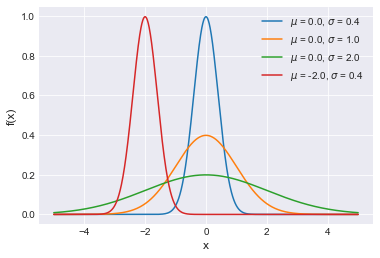

In [13]:
        import matplotlib.pyplot as plt
        import numpy as np
        import scipy.stats as st
        plt.style.use('seaborn-darkgrid')
        x = np.linspace(-5, 5, 1000)
        mus = [0., 0., 0., -2.]
        sds = [0.4, 1., 2., 0.4]
        for mu, sd in zip(mus, sds):
            pdf = st.norm.pdf(x, mu, sd)
            plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sd))
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.legend(loc=1)
        plt.show()